In [2]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

In [3]:
def X():
    p = p0
    i = 0
    q = p
    u = random.rand()
    while u > q:
        p = c(i)*p
        i +=1
        q +=p
    return i

In [17]:
def simupoisson(a, borne):
    p = math.exp(-a)
    i = 0
    q = p
    u = random.random()

    while u > q and q <= borne:
        i += 1
        p *= a / i
        q += p

    return i

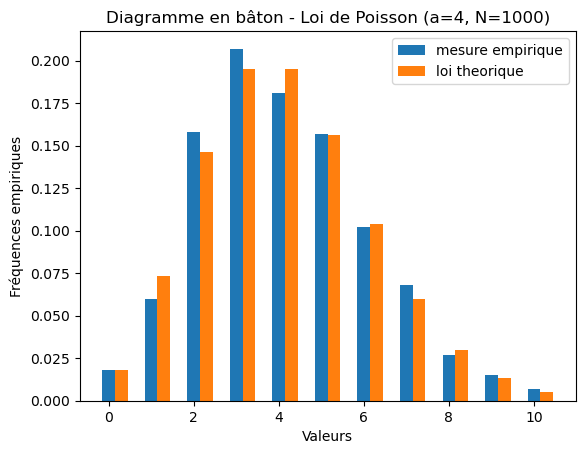

In [26]:
def poisson(a, k):
    return np.exp(-a) * a**k / np.math.factorial(k)

def testpoisson(a, N, borne):
    # Générer l'échantillon de taille N
    echantillon = [simupoisson(a, borne) for _ in range(N)]

    # Calculer les fréquences empiriques
    frequences = [echantillon.count(valeur) / N for valeur in set(echantillon)]
    valeurs = list(set(echantillon))

    x = range(0, borne + 1)
    
    # Tracer le diagramme en bâton
    width=0.3
    plt.bar(valeurs, frequences, width=width, align='center', label='mesure empirique')
    plt.bar(np.array(x) + width, [poisson(a, k) for k in x], width=width, label='loi theorique')
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquences empiriques')
    plt.legend()
    plt.title(f'Diagramme en bâton - Loi de Poisson (a={a}, N={N})')
    plt.show()

testpoisson(4, 1000, 10)

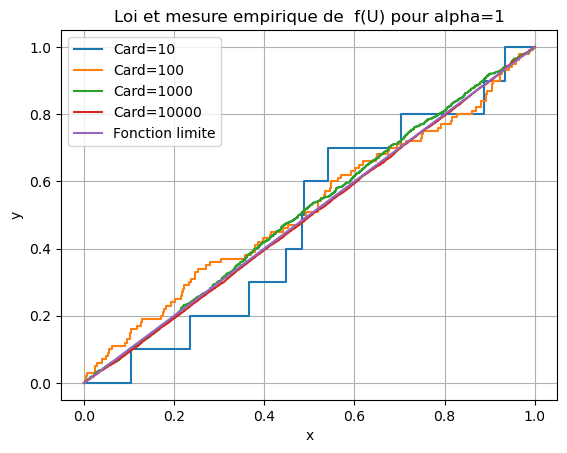

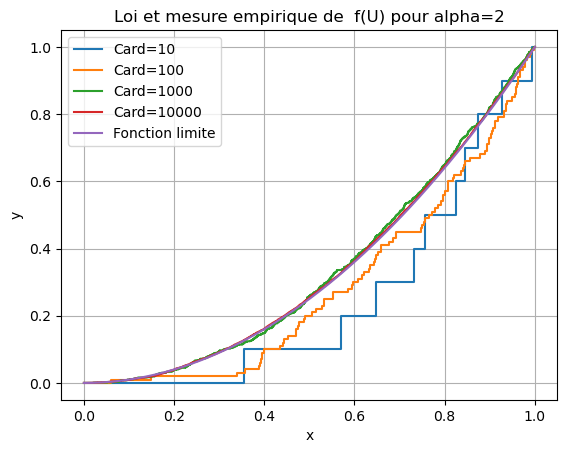

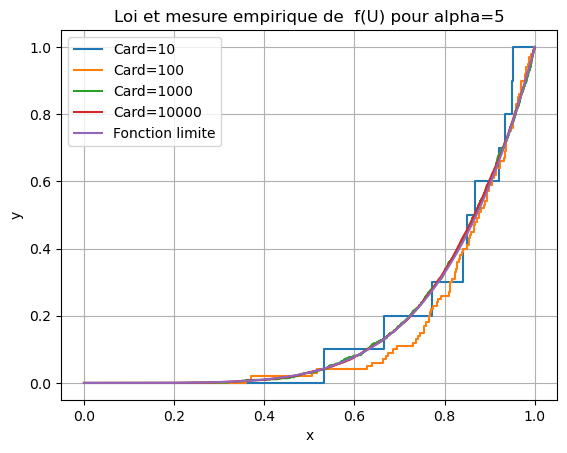

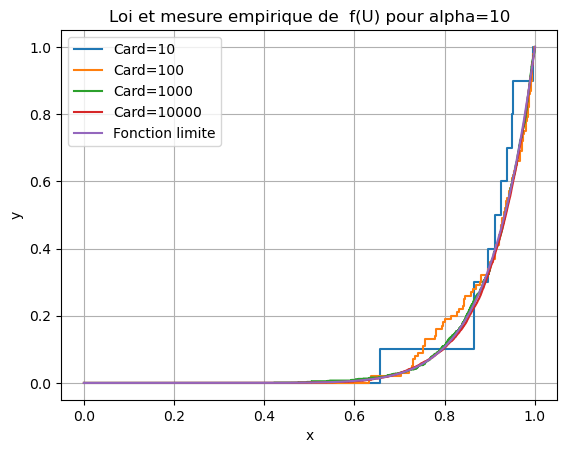

In [37]:
def inverseF(U, alpha):
    return U**(1/alpha)

def simubeta(alpha):
    return inverseF(np.random.rand(), alpha)

def testbeta(alpha, M):
    echantillon = [simubeta(alpha) for _ in range(M)]
    x = np.concatenate((np.array([0]), echantillon, np.array([1])))
    x.sort()
    y = [0]
    for i in range(M + 1):
        y.append(i/M)
    plt.step(x, y, label=f"Card={M}")
    plt.legend()
    plt.grid()

for alpha in [1, 2, 5, 10]:
    plt.figure()
    for m in [10, 100, 1000, 10000]:
        testbeta(alpha, m)

    x = np.linspace(0, 1, 200)
    plt.plot(x, x**alpha, label='Fonction limite')
    plt.legend()
    plt.grid()
    plt.title(f'Loi et mesure empirique de  f(U) pour alpha={alpha}')
    plt.xlabel('x')
    plt.ylabel('y')